<a href="https://colab.research.google.com/github/AaronArk/Hello-World/blob/master/Titanic_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frist Nueral Network

In this notebook I will be analysing the Titanic dataset from Kaggle using a ANN. 
Details of the dataset are stated below


survival	                   - Survival                         - 0 = No, 1 = Yes
pclass	                     - Ticket class	                 - 1 = 1st, 2 = 2nd, 3 = 3rd
sex	                            - Sex	
Age	                           - Age in years	
sibsp	                        - # of siblings / spouses aboard the Titanic	
parch	                        - # of parents / children aboard the Titanic	
ticket	                       - Ticket number	
fare	                          - Passenger fare	
cabin	                        - Cabin number	
embarked	               - Port of Embarkation


I will be using google colab  and their free access to a GPU to train my ANN.

First I will import all libaries need for my analysis and machine learing.

In [0]:
import tensorflow
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import missingno
%matplotlib inline

Next I will upload the dataset to my notebook enviroment

In [0]:
from google.colab import files

In [3]:
files.upload()

Saving test.csv to test.csv


{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r905,2,"Howard, Mr. Benjamin",male,63,1,0,24065,26,,S

In [4]:
files.upload()

Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
passID = test.PassengerId

In [6]:
# breif look the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


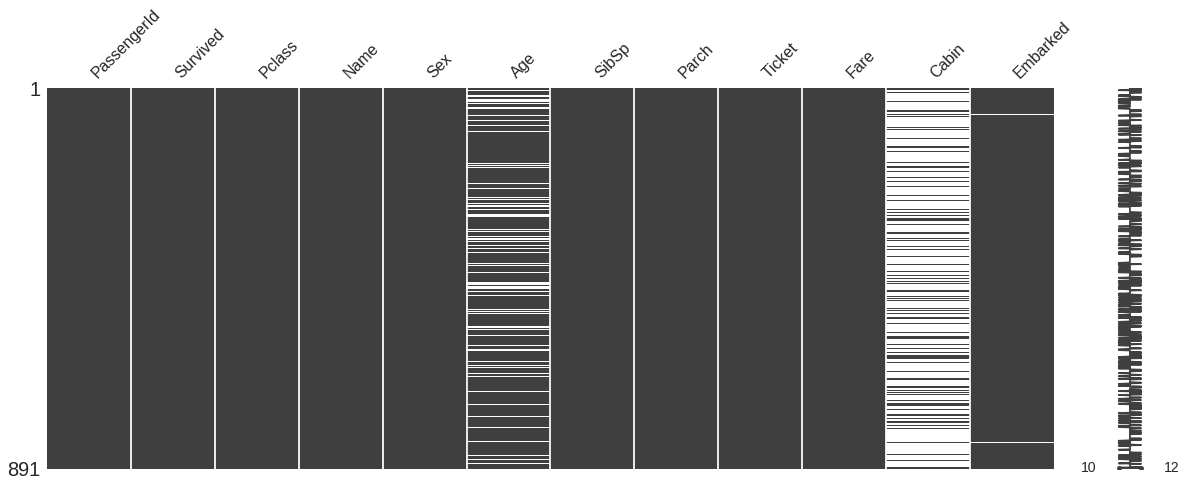

In [8]:
missingno.matrix(train, figsize = (20,7))

As there are missing values from the training set, I should also check the test set for missing values. I will combine these two datasets and deal with tthe missing values all in one.

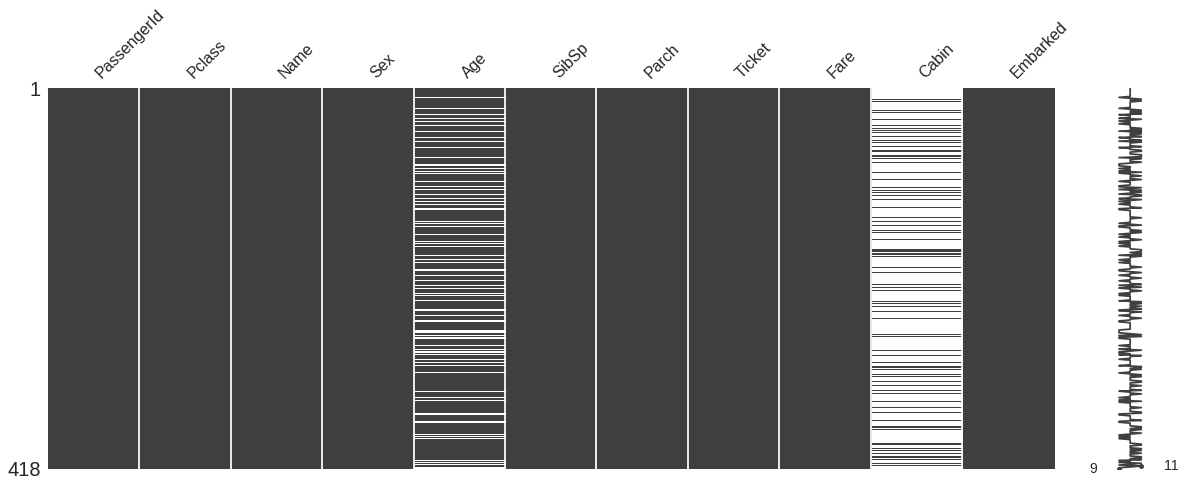

In [9]:
missingno.matrix(test, figsize = (20,7))

Here we can also see there is data missing from the test set. I shall combine these two datasets and deal with the missing data accordingly.

In [10]:
titanic = train.append(test, ignore_index=True)
train_indx = len(train)
test_indx = len(test)
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


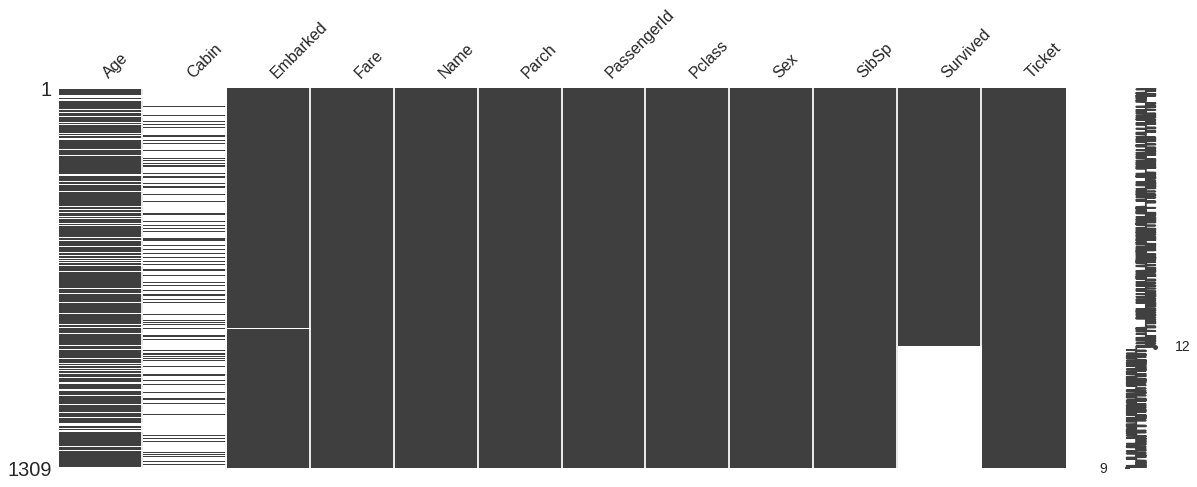

In [11]:
missingno.matrix(titanic, figsize = (20,7))

Now we have identified the missing values, we can deal with these appropiately.

There is a small number of missing values in the Embarked so I shall fill these with the most frequent value.

In [0]:
# fill embarked with most frequent value
titanic.Embarked = titanic.Embarked.fillna(train.Embarked.mode())

The Cabin feature has a lot of missing values so for now I will fill these values with 'U' for unknown.

In [13]:
titanic.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
B96 B98            4
C78                4
D                  4
F4                 4
C22 C26            4
F2                 4
E101               3
E34                3
C101               3
B58 B60            3
A34                3
B51 B53 B55        3
D19                2
D10 D12            2
D36                2
C123               2
C68                2
C124               2
C89                2
F G73              2
C92                2
C31                2
B78                2
C85                2
C32                2
C6                 2
                  ..
C51                1
A19                1
D47                1
F38                1
B79                1
B38                1
D40                1
D34                1
A11                1
D22                1
E17                1
B101               1
C99                1
E63                1
A29                1
D11                1
T            

As you can see there are a lot of unique Cabin values. I can extract the first letter of this to group together this feature

In [14]:
# fill missing cabin values with 'U'
titanic.Cabin = titanic.Cabin.fillna('U')
titanic.Cabin = titanic.Cabin.map(lambda x: x[0])
titanic.Cabin.value_counts()
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


An important feature we must deal with is Age. There are quite a few missing values here and instead of filling missing values with the mean or median age, I will use other features to get a more accurate estimate of a passengers age.

In [15]:
# we will fill missing age values with the median age based on Sex, Title and Pclass
# we will extract Title from name feature
def get_title(name):
  title = name.split('.')[0].split(',')[1].strip()
  return title

titanic['Title'] = titanic.Name.map(get_title)

titanic.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Don               1
Jonkheer          1
Mme               1
the Countess      1
Sir               1
Dona              1
Capt              1
Lady              1
Name: Title, dtype: int64

Using the extracted Titles, I shall group together the lower frequently occuring values based on their social status.

In [0]:
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

titanic['Title'] = titanic['Title'].map(normalized_titles)

I shall now group together the data by Sex, Pclass and Title.

In [18]:
# now I can group my Sex, Title and pClass
group = titanic.groupby(['Sex','Pclass', 'Title']) 
group.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

Using the above grouped data, I can now fill the missing age values with the median age based on their Sex, Pclass and Title.

In [0]:
titanic['Age'] = group.Age.apply(lambda x: x.fillna(x.median()))

In [20]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.278205,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.446690,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,26.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,36.500000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [0]:
# fill missing Fare entry using same technique above
titanic['Fare'] = group.Fare.apply(lambda x: x.fillna(x.median()))

In [23]:
#no missing values
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.278205,33.276075,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.446690,51.743642,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,26.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,36.500000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [24]:
# drop unwanted features
titanic.drop(columns = ['Name', 'PassengerId', 'Ticket'], inplace = True)
titanic.head()


,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
0,22.0,U,S,7.2500,0,3,male,1,0.0,Mr
1,38.0,C,C,71.2833,0,1,female,1,1.0,Mrs
2,26.0,U,S,7.9250,0,3,female,0,1.0,Miss
3,35.0,C,S,53.1000,0,1,female,1,1.0,Mrs
4,35.0,U,S,8.0500,0,3,male,0,0.0,Mr


Now there are no missing values in the dataset, I can now tackle the categorical features.
I will dummy variables for my categorical features with more thana 2 categories and label encode categorical features with 2 categories.

In [0]:
# create dummy variables
# drop one column of dummy variable to avoid dummy trap

pclass_dummy = pd.get_dummies(titanic.Pclass)
pclass_dummy.drop(pclass_dummy.columns[0], axis=1,inplace = True)

cabin_dummy = pd.get_dummies(titanic.Cabin)
cabin_dummy.drop(cabin_dummy.columns[0], axis=1,inplace = True)

embarked_dummy = pd.get_dummies(titanic.Embarked)
embarked_dummy.drop(embarked_dummy.columns[0], axis=1,inplace = True)

title_dummy = pd.get_dummies(titanic.Title)
title_dummy.drop(title_dummy.columns[0], axis=1,inplace = True)

# label encode Sex feature
labelencoder = LabelEncoder()
titanic.Sex = labelencoder.fit_transform(titanic.Sex)

The next step is to combine my dummy variables to my dataset.

In [0]:
titanic = pd.concat([titanic,pclass_dummy,cabin_dummy,embarked_dummy,title_dummy], axis = 1)

In [30]:
titanic.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,...,G,T,U,Q,S,Miss,Mr,Mrs,Officer,Royalty
0,22.0,U,S,7.2500,0,3,1,1,0.0,Mr,...,0,0,1,0,1,0,1,0,0,0
1,38.0,C,C,71.2833,0,1,0,1,1.0,Mrs,...,0,0,0,0,0,0,0,1,0,0
2,26.0,U,S,7.9250,0,3,0,0,1.0,Miss,...,0,0,1,0,1,1,0,0,0,0
3,35.0,C,S,53.1000,0,1,0,1,1.0,Mrs,...,0,0,0,0,1,0,0,1,0,0
4,35.0,U,S,8.0500,0,3,1,0,0.0,Mr,...,0,0,1,0,1,0,1,0,0,0


In [0]:
# drop unnecessary columns
titanic.drop(columns = ['Pclass', 'Cabin', 'Embarked', 'Title'], inplace = True)

In [32]:
titanic.head()

,Age,Fare,Parch,Sex,SibSp,Survived,2,3,B,C,...,G,T,U,Q,S,Miss,Mr,Mrs,Officer,Royalty
0,22.0,7.2500,0,1,1,0.0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
1,38.0,71.2833,0,0,1,1.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,0,1.0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
3,35.0,53.1000,0,0,1,1.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,35.0,8.0500,0,1,0,0.0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0


Now I have all the features I want and in the correct format, I shall normalise my data so my ANN can converge and learning quicker.

In [33]:
sc = StandardScaler()
titanic = pd.DataFrame(sc.fit_transform(titanic))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
titanic.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.541471,-0.503173,-0.445,0.743497,0.481288,-0.789272,-0.518084,0.919925,-0.228584,-0.278148,...,-0.061922,-0.02765,0.539377,-0.32204,0.657394,-0.500239,0.853929,-0.424668,-0.133734,-0.067858
1,0.648868,0.734810,-0.445,-1.344995,0.481288,1.266990,-0.518084,-1.087045,-0.228584,3.595210,...,-0.061922,-0.02765,-1.853992,-0.32204,-1.521159,-0.500239,-1.171058,2.354782,-0.133734,-0.067858
2,-0.243886,-0.490123,-0.445,-1.344995,-0.479087,1.266990,-0.518084,0.919925,-0.228584,-0.278148,...,-0.061922,-0.02765,0.539377,-0.32204,0.657394,1.999046,-1.171058,-0.424668,-0.133734,-0.067858
3,0.425680,0.383265,-0.445,-1.344995,0.481288,1.266990,-0.518084,-1.087045,-0.228584,3.595210,...,-0.061922,-0.02765,-1.853992,-0.32204,0.657394,-0.500239,-1.171058,2.354782,-0.133734,-0.067858
4,0.425680,-0.487707,-0.445,0.743497,-0.479087,-0.789272,-0.518084,0.919925,-0.228584,-0.278148,...,-0.061922,-0.02765,0.539377,-0.32204,0.657394,-0.500239,0.853929,-0.424668,-0.133734,-0.067858


Next I shall transform the Survived column (5) back into its original form.

In [35]:
def survived(num):
  if num < 0:
    num = 0
  else:
    num =1
  return num


titanic[5] = titanic[5].map(survived)
titanic.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.541471,-0.503173,-0.445,0.743497,0.481288,0,-0.518084,0.919925,-0.228584,-0.278148,...,-0.061922,-0.02765,0.539377,-0.32204,0.657394,-0.500239,0.853929,-0.424668,-0.133734,-0.067858
1,0.648868,0.734810,-0.445,-1.344995,0.481288,1,-0.518084,-1.087045,-0.228584,3.595210,...,-0.061922,-0.02765,-1.853992,-0.32204,-1.521159,-0.500239,-1.171058,2.354782,-0.133734,-0.067858
2,-0.243886,-0.490123,-0.445,-1.344995,-0.479087,1,-0.518084,0.919925,-0.228584,-0.278148,...,-0.061922,-0.02765,0.539377,-0.32204,0.657394,1.999046,-1.171058,-0.424668,-0.133734,-0.067858
3,0.425680,0.383265,-0.445,-1.344995,0.481288,1,-0.518084,-1.087045,-0.228584,3.595210,...,-0.061922,-0.02765,-1.853992,-0.32204,0.657394,-0.500239,-1.171058,2.354782,-0.133734,-0.067858
4,0.425680,-0.487707,-0.445,0.743497,-0.479087,0,-0.518084,0.919925,-0.228584,-0.278148,...,-0.061922,-0.02765,0.539377,-0.32204,0.657394,-0.500239,0.853929,-0.424668,-0.133734,-0.067858


The data preprocessing is now finished and I shall split the dataset back into a train and test set.

In [0]:
train = titanic[:train_indx]
test = titanic[train_indx:]

test = test.drop(columns = [5])
test = np.array(test)

In [37]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.541471,-0.503173,-0.445,0.743497,0.481288,0,-0.518084,0.919925,-0.228584,-0.278148,...,-0.061922,-0.02765,0.539377,-0.32204,0.657394,-0.500239,0.853929,-0.424668,-0.133734,-0.067858
1,0.648868,0.734810,-0.445,-1.344995,0.481288,1,-0.518084,-1.087045,-0.228584,3.595210,...,-0.061922,-0.02765,-1.853992,-0.32204,-1.521159,-0.500239,-1.171058,2.354782,-0.133734,-0.067858
2,-0.243886,-0.490123,-0.445,-1.344995,-0.479087,1,-0.518084,0.919925,-0.228584,-0.278148,...,-0.061922,-0.02765,0.539377,-0.32204,0.657394,1.999046,-1.171058,-0.424668,-0.133734,-0.067858
3,0.425680,0.383265,-0.445,-1.344995,0.481288,1,-0.518084,-1.087045,-0.228584,3.595210,...,-0.061922,-0.02765,-1.853992,-0.32204,0.657394,-0.500239,-1.171058,2.354782,-0.133734,-0.067858
4,0.425680,-0.487707,-0.445,0.743497,-0.479087,0,-0.518084,0.919925,-0.228584,-0.278148,...,-0.061922,-0.02765,0.539377,-0.32204,0.657394,-0.500239,0.853929,-0.424668,-0.133734,-0.067858


In [0]:
# drop labels from dataset to create features array
# assign labels from dataset

X = train.drop(columns = [5])
X1 = np.array(X)
y = train[5]
y1 = np.array(y)

Now I have my features and labels seperated, I can create my ANN.

In [82]:
# number of features. Needed for the input layer of ANN
input_dim = X.shape[1]

# creating ANN with 3 hidden layers
classifier = Sequential()

# first 2 hidden layers will have 9 nodes and the last will have 5 modes
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_dim))
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model = classifier.fit(X1, y1, batch_size = 32, epochs = 150, validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/150
712/712 [==============================] - 13s 18ms/step - loss: 0.6922 - acc: 0.6067 - val_loss: 0.6901 - val_acc: 0.6425
Epoch 2/150
712/712 [==============================] - 0s 265us/step - loss: 0.6896 - acc: 0.6096 - val_loss: 0.6864 - val_acc: 0.6425
Epoch 3/150
712/712 [==============================] - 0s 263us/step - loss: 0.6847 - acc: 0.6306 - val_loss: 0.6769 - val_acc: 0.7989
Epoch 4/150
712/712 [==============================] - 0s 267us/step - loss: 0.6687 - acc: 0.8202 - val_loss: 0.6481 - val_acc: 0.8268
Epoch 5/150
712/712 [==============================] - 0s 261us/step - loss: 0.6290 - acc: 0.7879 - val_loss: 0.5975 - val_acc: 0.8156
Epoch 6/150
712/712 [==============================] - 0s 254us/step - loss: 0.5878 - acc: 0.7851 - val_loss: 0.5628 - val_acc: 0.8212
Epoch 7/150
712/712 [==============================] - 0s 258us/step - loss: 0.5604 - acc: 0.7992 - val_loss: 0.5413 - val_acc: 0.8380
Epoch 8/1

In [84]:
val_acc = np.mean(model.history['val_acc'])
val_acc

0.8737057736843435

The model acheived an accuracy of  around 87.3%. Below I will graph the train score agasint the validation score.

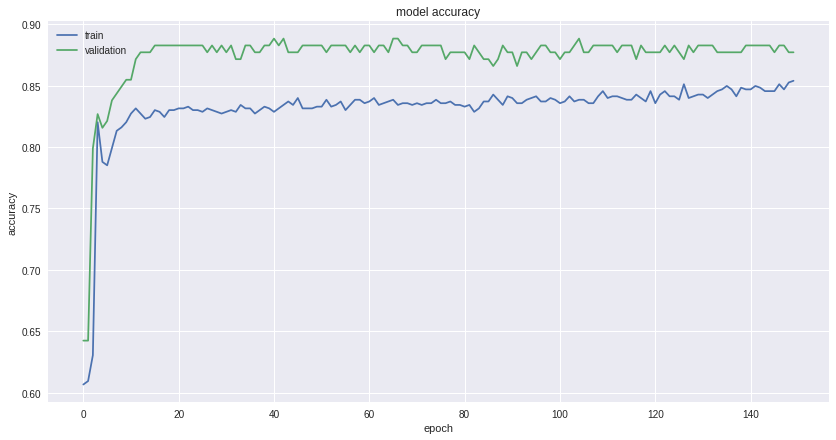

In [85]:
# summarry history for accuracy
plt.figure(figsize=(14,7))
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

To get a more accurate evaluation of this model, I will perform K cross- validation on my model.

In [0]:
# creating build function to create my previous ANN
def create_nn():
  input_dim = X.shape[1]

  # creating ANN with 3 hidden layers
  classifier = Sequential()

  # first 2 hidden layers will have 9 nodes and the last will have 5 modes
  classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_dim))
  classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

  # Compiling the ANN
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  
  return classifier


In [0]:
classifier = KerasClassifier(build_fn=create_nn, epochs=150, batch_size=32)

In [78]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
results = cross_val_score(classifier, X1, y1, cv=kfold)

Epoch 1/150
801/801 [==============================] - 11s 14ms/step - loss: 0.6918 - acc: 0.6167
Epoch 2/150
801/801 [==============================] - 0s 252us/step - loss: 0.6886 - acc: 0.6167
Epoch 3/150
801/801 [==============================] - 0s 247us/step - loss: 0.6805 - acc: 0.6167
Epoch 4/150
801/801 [==============================] - 0s 260us/step - loss: 0.6567 - acc: 0.6167
Epoch 5/150
801/801 [==============================] - 0s 247us/step - loss: 0.6064 - acc: 0.6330
Epoch 6/150
801/801 [==============================] - 0s 266us/step - loss: 0.5436 - acc: 0.8202
Epoch 7/150
801/801 [==============================] - 0s 279us/step - loss: 0.5016 - acc: 0.8265
Epoch 8/150
801/801 [==============================] - 0s 269us/step - loss: 0.4710 - acc: 0.8352
Epoch 9/150
801/801 [==============================] - 0s 267us/step - loss: 0.4455 - acc: 0.8315
Epoch 10/150
801/801 [==============================] - 0s 267us/step - loss: 0.4289 - acc: 0.8240
Epoch 11/150
801/80

In [0]:
mean = results.mean()
variance = results.std()

In [83]:
mean

0.8013809447535565

In [81]:
variance

0.07113814599045636

Looking at the mean accuracy (80.1%) we can see that it is much lower than the first score we got at 87%. This shows that the first score was not a true representation of the models accuracy. Also, we can look at the variance of the scores which was 7%. This score shows that the mean accuracy of 80% is a better represention as the spread of scores is low.

Below I shall now predict on the test set and get my subbmission ready for Kaggle!

In [0]:
predict = classifier.predict(test)

In [0]:
def convert_prob(num):
  if num < 0.5:
    num = 0
  else:
    num =1
  return num

predict = np.array(predict)
predict = predict.flatten()
predict = pd.Series(predict).map(convert_prob)

In [0]:
subb = pd.concat([passID, predict], axis = 1)
subb.columns = ['PassengerId', 'Survived']
subb.to_csv('subbNN.csv', index=False)

In [0]:
files.download('subbNN.csv')

In [0]:
kaggle = pd.read_csv('subbNN.csv')

In [94]:
kaggle.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Summary

In this notebook I have taken advantage of google colab's free GPU which has allowed me to create my first ANN. The main focus was to create a basic ANN and evaluate it, which has given me good insight on how neural networks are contructed. 

Things to improve upon would be more feature exploration and EDA.

